In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json

**Our dataset contains 2 tables. The main table contains the information about pedestrian counts counted by the sensers in Melbourne per hour.**

In [2]:
df1 = pd.read_csv('../data/Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv')
df1.head(n=3)

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,37,Lygon St (East),216


**The complementary table contains the information about the sensers, sunch as sensers' name and location.**

In [3]:
df2 = pd.read_csv('../data/Pedestrian_Counting_System_-_Sensor_Locations.csv')
df2.rename(columns={'sensor_id':'Sensor_ID'}, inplace=True)
df2.head(n=3)

,Sensor_ID,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,55,Elizabeth St-La Trobe St (East),Eli380_T,2018/07/19,A,NaN,North,South,-37.809889,144.961343,"(-37.80988941, 144.96134331)"
1,45,Little Collins St-Swanston St (East),Swa148_T,2017/06/29,A,NaN,North,South,-37.814141,144.966094,"(-37.81414074, 144.9660938)"
2,61,RMIT Building 14,RMIT14_T,2019/06/28,A,NaN,North,South,-37.807675,144.963091,"(-37.80767455, 144.96309115)"


In [28]:
print([sensor['sensor_description']] for sensor in df2.iterrows())

<generator object <genexpr> at 0x7fe521c15830>


**First of all, the 2 tables are join together by senser ID. Then select the useful columns.**

In [4]:
df = df1.merge(df2, on=['Sensor_ID'], how='inner')

df = df[['Year', 'Month', 'Mdate', 'Day', 'Time', 'Sensor_ID', 'Sensor_Name', 'Hourly_Counts', 'latitude', 'longitude']]
df = df[df['Year'].isin(['2019'])]; df = df.dropna()
mapping_M = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
       'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.Month = df.Month.map(mapping_M)
mapping_W = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
df.Day = df.Day.map(mapping_W)

N, M = np.shape(df)
print('There are %s samples and %s attributes in our dataset'%(N,M), '\n')
print('Here is a piece of our dataset: ')
df.head()

There are 456829 samples and 10 attributes in our dataset 

Here is a piece of our dataset: 


,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,latitude,longitude
0,2019,11,1,5,17,34,Flinders St-Spark La,300,-37.81538,144.97415
1,2019,11,1,5,18,34,Flinders St-Spark La,240,-37.81538,144.97415
2,2019,11,1,5,19,34,Flinders St-Spark La,158,-37.81538,144.97415
3,2019,11,1,5,20,34,Flinders St-Spark La,118,-37.81538,144.97415
4,2019,11,1,5,21,34,Flinders St-Spark La,131,-37.81538,144.97415


In [5]:
df.to_csv('../data/final_data.csv')

**The hourly pedestrian counts distribution:**

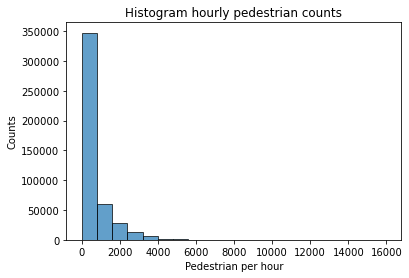

In [6]:
count, bins = np.histogram(df.Hourly_Counts, bins=20)
plt.hist(df.Hourly_Counts, bins=bins, alpha=0.7, edgecolor='black')
#plt.yticks(np.arange(0, 300, 50))
plt.xlabel('Pedestrian per hour'); plt.ylabel('Counts'); plt.title('Histogram hourly pedestrian counts')
plt.show()

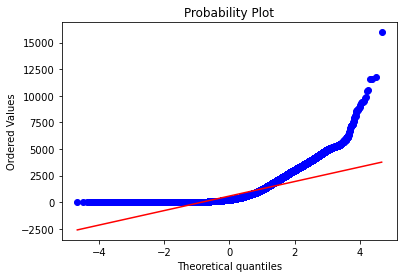

In [7]:
from scipy import stats
stats.probplot(df.Hourly_Counts, plot=plt); plt.show()

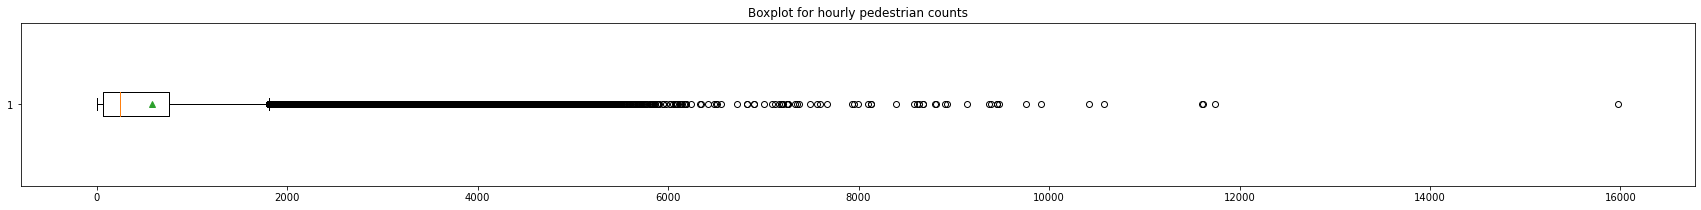

In [8]:
plt.figure(figsize=(30,3))
plt.boxplot(df.Hourly_Counts, vert=False, showmeans=True)
plt.title('Boxplot for hourly pedestrian counts')
plt.show()

**The sensors' latitude distribution:**

In [9]:
df2['Year'] = pd.to_datetime(df2['installation_date']).dt.year
df2 = df2[df2['Year'].isin(range(2000, 2020))]

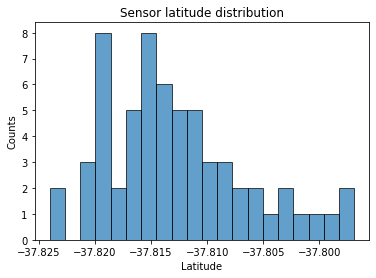

In [10]:
count, bins = np.histogram(df2.latitude, bins=20)
plt.hist(df2.latitude, bins=bins, alpha=0.7, edgecolor='black')
#plt.yticks(np.arange(0, 300, 50))
plt.xlabel('Latitude'); plt.ylabel('Counts'); plt.title('Sensor latitude distribution')
plt.show()

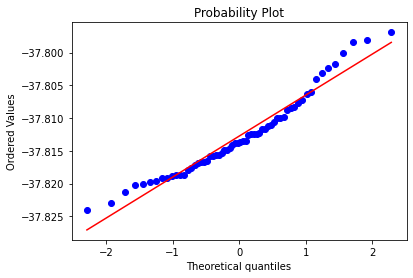

In [11]:
stats.probplot(df2.latitude, plot=plt); plt.show()

**Sensor distribution across Melbourne:**

In [12]:
lat = np.array(df2.latitude)
lon = np.array(df2.longitude)
sensor_id = np.array(df.Sensor_ID).astype(str)
map_SF = folium.Map(location=[-37.8136, 144.9631], zoom_start = 14, width='70%', height='70%')
for i in range(len(df2.index)):
    folium.Marker(['%.4f'%lat[i], '%.4f'%lon[i]], pop_up=sensor_id[i], icon=folium.Icon(color='red')).add_to(map_SF)
map_SF

In [13]:
idx = df['Hourly_Counts'].max()
idx

15979

In [14]:
df[df.Hourly_Counts>=10000]

,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,latitude,longitude
834670,2019,11,15,5,23,57,Bourke St Bridge,15979,-37.817673,144.950256
842233,2019,12,18,3,17,57,Bourke St Bridge,11612,-37.817673,144.950256
843234,2019,8,22,4,18,57,Bourke St Bridge,10422,-37.817673,144.950256
843280,2019,8,24,6,16,57,Bourke St Bridge,11605,-37.817673,144.950256
2249180,2019,8,23,5,22,7,Birrarung Marr,11742,-37.818629,144.971694
2249202,2019,8,24,6,20,7,Birrarung Marr,10576,-37.818629,144.971694


In [15]:
df[df.Hourly_Counts>=10000].shape

(6, 10)

In [16]:
data = df.set_index(['Sensor_ID', 'Month', 'Mdate', 'Time']).sort_index()
data

Year  Day                 Sensor_Name  \
Sensor_ID Month Mdate Time                                          
1         1     1     0     2019    2  Bourke Street Mall (North)   
                      1     2019    2  Bourke Street Mall (North)   
                      2     2019    2  Bourke Street Mall (North)   
                      3     2019    2  Bourke Street Mall (North)   
                      4     2019    2  Bourke Street Mall (North)   
...                          ...  ...                         ...   
62        12    31    19    2019    2         La Trobe St (North)   
                      20    2019    2         La Trobe St (North)   
                      21    2019    2         La Trobe St (North)   
                      22    2019    2         La Trobe St (North)   
                      23    2019    2         La Trobe St (North)   

                            Hourly_Counts   latitude   longitude  
Sensor_ID Month Mdate Time                                        
1         1     1     0               918 -37.813494  144.965153  
                      1               995 -37.813494  144.965153  
                      2               416 -37.813494  144.965153  
                      3               382 -37.813494  144.965153  
                      4               165 -37.813494  144.965153  
...                                   ...        ...         ...  
62        12    31    19              420 -37.809965  144.962165  
                      20              340 -37.809965  144.962165  
                      21              382 -37.809965  144.962165  
                      22              369 -37.809965  144.962165  
                      23              271 -37.809965  144.962165  

[456829 rows x 6 columns]

In [17]:
data.loc[1,1,1,1,:]['Hourly_Counts'].values[-1]

995

In [18]:
data.index

MultiIndex([( 1,  1,  1,  0),
            ( 1,  1,  1,  1),
            ( 1,  1,  1,  2),
            ( 1,  1,  1,  3),
            ( 1,  1,  1,  4),
            ( 1,  1,  1,  5),
            ( 1,  1,  1,  6),
            ( 1,  1,  1,  7),
            ( 1,  1,  1,  8),
            ( 1,  1,  1,  9),
            ...
            (62, 12, 31, 14),
            (62, 12, 31, 15),
            (62, 12, 31, 16),
            (62, 12, 31, 17),
            (62, 12, 31, 18),
            (62, 12, 31, 19),
            (62, 12, 31, 20),
            (62, 12, 31, 21),
            (62, 12, 31, 22),
            (62, 12, 31, 23)],
           names=['Sensor_ID', 'Month', 'Mdate', 'Time'], length=456829)

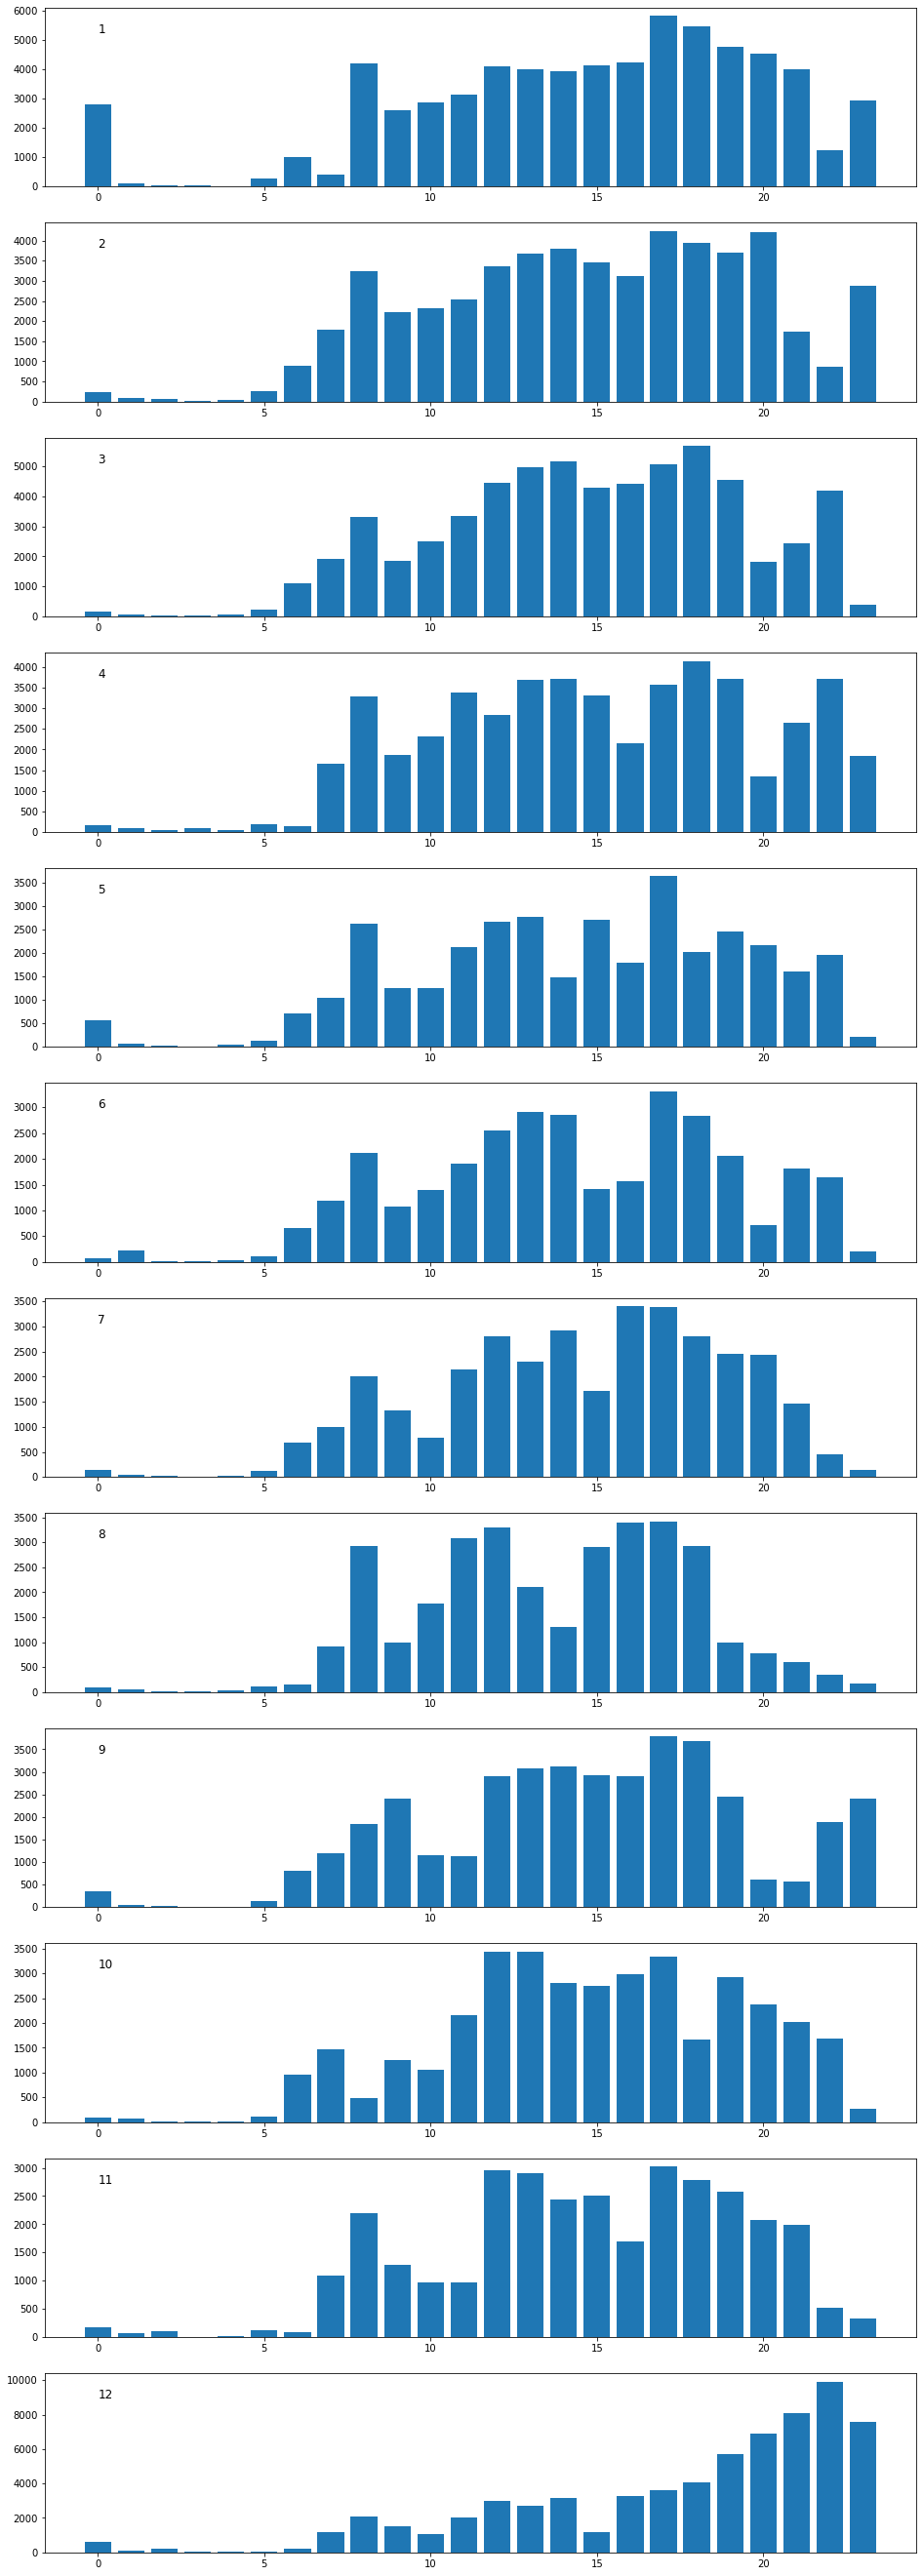

In [19]:
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(16,48))
for i in range(1, 13):
    counts_mode = np.zeros(24)
    for j in range(24):
        counts_mode[j] = data.loc[35,i,:,j,:]['Hourly_Counts'].mode().values[-1]
    axes[i-1].bar(range(24),counts_mode)
    axes[i-1].text(0,0.9*max(counts_mode), i, fontsize='large')

In [20]:
sensors = np.sort(df['Sensor_ID'].unique())
sensor = np.zeros([sensors.max(),12,31,24])
for i in sensors:
    month = np.zeros([12,31,24])
    for j in range(1,13):
        print(j)
        day = np.zeros([31,24])
        for m in range(1,32):
            mode = np.zeros(24)
            for k in range(24):
                try:
                    mode[k] = data.loc[i,j,m,k,:]['Hourly_Counts'].values[-1]
                except:
                    mode[k] = 0
            day[m-1] = mode
        month[j-1] = day
    sensor[i-1] = month

1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1

In [21]:
saveLocation = '../data/sensors_mode.npy'
np.save(saveLocation, sensor)
print('sensors mode value is saved at {}'.format(saveLocation))

sensors mode value is saved at ../data/sensors_mode.npy


In [22]:
np.load(saveLocation).shape

(62, 12, 31, 24)

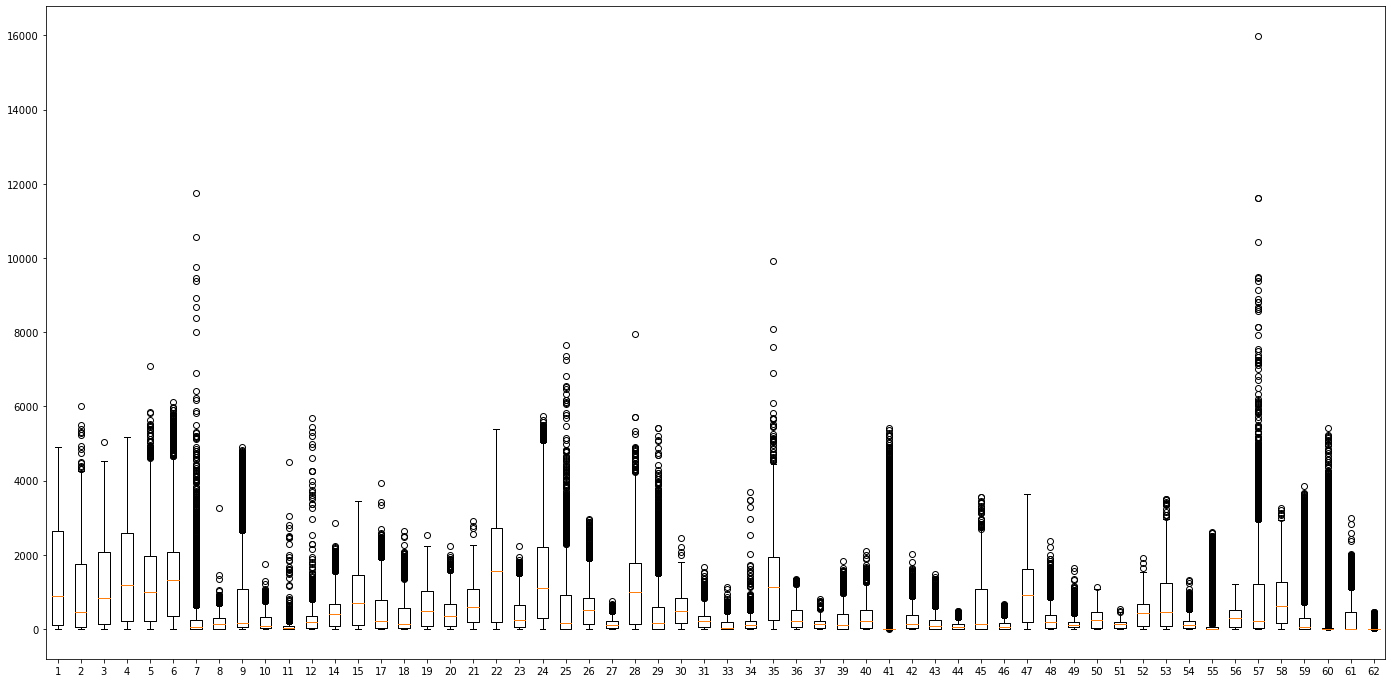

In [23]:
sensor = pd.DataFrame()
for i in sensors:
    '''
    month = np.zeros([12,24])
    for j in range(1,13):
        mode = np.zeros(24)
        for k in range(24):
            try:
                mode[k] = data.loc[i,j,:,k,:]['Hourly_Counts'].mode().values[-1]
            except:
                mode[k] = 0
    '''
    sensor[i] = data.loc[i,:]['Hourly_Counts']
sensor = sensor.fillna(0)
plt.figure(figsize=(24,12))
fig = plt.boxplot(sensor,labels=sensor.columns)

In [24]:
sensor.describe()

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
count,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,...,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000,8616.000000
mean,1350.731314,928.446611,1114.929782,1448.392990,1234.686513,1437.034006,245.067549,192.029828,770.160747,187.032962,...,718.894034,159.030873,250.482358,318.143802,823.735608,807.757428,274.537953,402.582753,264.137999,38.441156
std,1316.773801,1012.176214,1002.232135,1217.268114,1102.978037,1179.429738,621.577884,199.065036,1119.181475,215.051482,...,693.478644,162.498541,540.316272,267.837966,1208.001993,712.703230,553.797525,939.062090,428.872221,85.049334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,70.000000,151.000000,231.750000,211.000000,365.750000,0.000000,17.000000,48.000000,21.000000,...,83.000000,27.000000,0.000000,49.000000,40.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,895.000000,465.000000,828.000000,1201.000000,999.000000,1318.000000,48.000000,142.500000,162.000000,86.000000,...,472.000000,113.000000,0.000000,310.500000,228.000000,631.500000,50.000000,0.000000,0.000000,0.000000
75%,2652.000000,1765.000000,2073.000000,2589.000000,1974.000000,2086.250000,259.000000,295.000000,1092.250000,319.000000,...,1239.000000,231.000000,59.250000,520.000000,1207.250000,1283.000000,294.250000,22.000000,453.250000,8.250000
max,4896.000000,6025.000000,5053.000000,5177.000000,7087.000000,6134.000000,11742.000000,3275.000000,4895.000000,1754.000000,...,3512.000000,1316.000000,2626.000000,1219.000000,15979.000000,3261.000000,3849.000000,5424.000000,2984.000000,475.000000
